# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 6.6 MB/s eta 0:00:01     |▋                               | 40 kB 22.3 MB/s eta 0:00:01     |████████████                    | 798 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 14.8 MB/s eta 0:00:01
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY** 

- Reshaping the data: Reshape the dataset into a 2D array of size (28, 28) to match the size of the images in the dataset.

- Normalizing the data: Normalize the pixel values of the images to be between 0 and 1. This helps to improve the performance of the machine learning models. 

- Flattening the data: Flatten the images into a 1D array of size (784,).

- Splitting the data: Split the dataset into training and testing sets. The training set is used to train the machine learning model, while the testing set is used to evaluate the performance of the model.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
torch.Size([60000, 28, 28])
torch.Size([60000])
Shape:  torch.Size([1, 28, 28]) 
Label:  5


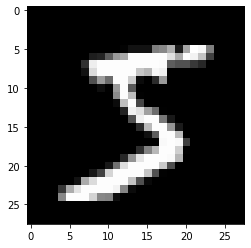

In [5]:
# Explore data
print(training_data)
print(test_data)

print(training_data.data.size())
print(training_data.targets.size())

image, label = training_data[0]
print('Shape: ', image.shape, '\nLabel: ', label)
plt.imshow(image.reshape((28,28)), cmap="gray")

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
# Define the class for your neural network
class MultiLayerPerceptron(nn.Module):
    def __init__(self, layers=[120,84]):
        super().__init__()
        self.linear1 = nn.Linear(784,layers[0])
        self.linear2 = nn.Linear(layers[0],layers[1])
        self.linear3 = nn.Linear(layers[1],10)
    
    def forward(self,X):
        #X = torch.flatten(X, 1) # flattening performed in training cell
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)
 
#Instantiate the model
mlp = MultiLayerPerceptron()
mlp.to(device)

MultiLayerPerceptron(
  (linear1): Linear(in_features=784, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
for images, labels in train_loader:
    print("Initial Batch Shape: ", images.size())
    break
print("Batch Shape after Flattening: ", images.view(100,-1).size())

Initial Batch Shape:  torch.Size([100, 1, 28, 28])
Batch Shape after Flattening:  torch.Size([100, 784])


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [12]:
# Choose an optimizer
clf = MultiLayerPerceptron()
#optimizer = optim.SGD(clf.parameters(), lr=0.001,momentum=0.8) #used in 1st training
optimizer = optim.Adam(clf.parameters(), lr=0.001) #used in 2nd training

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
epochs = 10
train_losses = list()
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    #Run the training batches
    for b, (inputs, labels) in enumerate(train_loader):
        b+=1
        
        #Apply the model
        labels_pred = clf(inputs.view(100, -1)) # Here we flatten training inputs
        loss = criterion(labels_pred, labels)
        
        #Calculate the number of correct predictions
        predicted = torch.max(labels_pred.data, 1)[1] # the prediction that has the maximum probability
        batch_corr = (predicted == labels).sum()
        trn_corr += batch_corr
        
        #Update paraeters
        optimizer.zero_grad() #reset the gradients after each training step
        loss.backward() #to trigger backprop
        optimizer.step() #per form parameter update
        
        #Print interim results
        if b%600 == 0:
            print(f'Epoch: {i:2} Batch: {b:4} [{100*b:6}/60000] Train loss: {loss.item():10.8f} Train accuracy:{trn_corr.item()/len(train_loader):.3f}%')

    #Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
                  
    #Run the testing batches:
    with torch.no_grad(): #don't calcalate gradients during testing
        for b, (test_inputs, test_labels) in enumerate(test_loader):
            labels_val = clf(test_inputs.view(500,-1))
                  
            #Tally the number of correct pradictions
            predicted = torch.max(labels_val.data, 1)[1]
            tst_corr += (predicted == test_labels).sum()
            
    #Update test loss & accuracy for the epoch
    loss = criterion(labels_val, test_labels)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    

Epoch:  0 Batch:  600 [ 60000/60000] Train loss: 1.18396556 Train accuracy:49.985%
Epoch:  1 Batch:  600 [ 60000/60000] Train loss: 0.52136785 Train accuracy:81.582%
Epoch:  2 Batch:  600 [ 60000/60000] Train loss: 0.40568778 Train accuracy:86.863%
Epoch:  3 Batch:  600 [ 60000/60000] Train loss: 0.39989352 Train accuracy:88.467%
Epoch:  4 Batch:  600 [ 60000/60000] Train loss: 0.45838889 Train accuracy:89.442%
Epoch:  5 Batch:  600 [ 60000/60000] Train loss: 0.28965244 Train accuracy:90.000%
Epoch:  6 Batch:  600 [ 60000/60000] Train loss: 0.35015184 Train accuracy:90.445%
Epoch:  7 Batch:  600 [ 60000/60000] Train loss: 0.40590727 Train accuracy:90.838%
Epoch:  8 Batch:  600 [ 60000/60000] Train loss: 0.17173590 Train accuracy:91.150%
Epoch:  9 Batch:  600 [ 60000/60000] Train loss: 0.32974309 Train accuracy:91.427%


Plot the training loss (and validation loss/accuracy, if recorded).

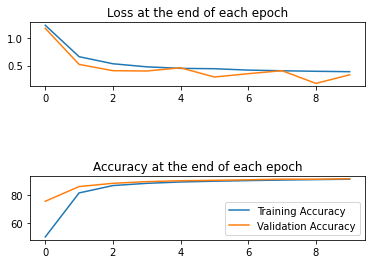

In [10]:
trn_loss = [trn.item() for trn in train_losses]

plt.subplot(3,1,1)
plt.plot(test_losses, label="Validation Loss")
plt.plot(trn_loss, label="Training Loss")
plt.title("Loss at the end of each epoch")

plt.subplot(3,1,3)
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")

plt.legend()

#### Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
print(f'Test Accuracy: {test_correct[-1].item()*100/10000:.3f}%')

Test Accuracy: 91.760%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [13]:
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    #Run the training batches
    for b, (inputs, labels) in enumerate(train_loader):
        b+=1
        
        #Apply the model
        labels_pred = clf(inputs.view(100, -1)) # Here we flatten training inputs
        loss = criterion(labels_pred, labels)
        
        #Calculate the number of correct predictions
        predicted = torch.max(labels_pred.data, 1)[1] # the prediction that has the maximum probability
        batch_corr = (predicted == labels).sum()
        trn_corr += batch_corr
        
        #Update paraeters
        optimizer.zero_grad() #reset the gradients after each training step
        loss.backward() #to trigger backprop
        optimizer.step() #per form parameter update
        
        #Print interim results
        if b%600 == 0:
            print(f'Epoch: {i:2} Batch: {b:4} [{100*b:6}/60000] Train loss: {loss.item():10.8f} Train accuracy:{trn_corr.item()/len(train_loader):.3f}%')

    #Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
                  
    #Run the testing batches:
    with torch.no_grad(): #don't calcalate gradients during testing
        for b, (test_inputs, test_labels) in enumerate(test_loader):
            labels_val = clf(test_inputs.view(500,-1))
                  
            #Tally the number of correct pradictions
            predicted = torch.max(labels_val.data, 1)[1]
            tst_corr += (predicted == test_labels).sum()
            
    #Update test loss & accuracy for the epoch
    loss = criterion(labels_val, test_labels)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    

Epoch:  0 Batch:  600 [ 60000/60000] Train loss: 0.23556261 Train accuracy:87.315%
Epoch:  1 Batch:  600 [ 60000/60000] Train loss: 0.28308037 Train accuracy:93.972%
Epoch:  2 Batch:  600 [ 60000/60000] Train loss: 0.18482222 Train accuracy:95.612%
Epoch:  3 Batch:  600 [ 60000/60000] Train loss: 0.10585508 Train accuracy:96.458%
Epoch:  4 Batch:  600 [ 60000/60000] Train loss: 0.03216822 Train accuracy:96.922%
Epoch:  5 Batch:  600 [ 60000/60000] Train loss: 0.06703488 Train accuracy:97.300%
Epoch:  6 Batch:  600 [ 60000/60000] Train loss: 0.11275605 Train accuracy:97.637%
Epoch:  7 Batch:  600 [ 60000/60000] Train loss: 0.01169978 Train accuracy:97.817%
Epoch:  8 Batch:  600 [ 60000/60000] Train loss: 0.08534731 Train accuracy:97.942%
Epoch:  9 Batch:  600 [ 60000/60000] Train loss: 0.15783530 Train accuracy:98.340%


In [14]:
print(f'Test Accuracy After Change of Optimiser: {test_correct[-1].item()*100/10000:.3f}%')

Test Accuracy After Change of Optimiser: 97.470%


## Saving your model
Using `torch.save`, save your model for future loading.

In [15]:
torch.save(clf.state_dict(), 'Project2MnistClassification.pt')

In [16]:
#Load trained model
clf = MultiLayerPerceptron(*args, **kwargs)
clf.load_state_dict(torch.load('Project2MnistClassification.pt'))
clf.eval()